In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [3]:
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

In [4]:
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0}
eq = kumamoto

In [5]:
df_regional = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=200, m=1)

In [6]:
df_regional = df_regional.loc[df_regional.index < eq['time']]
df_regional = df_regional[df_regional.depth <=25]
df_regional = df_regional[df_regional.mag >= 0.5]

(<matplotlib.figure.Figure at 0x7f07188bb710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0718868278>)

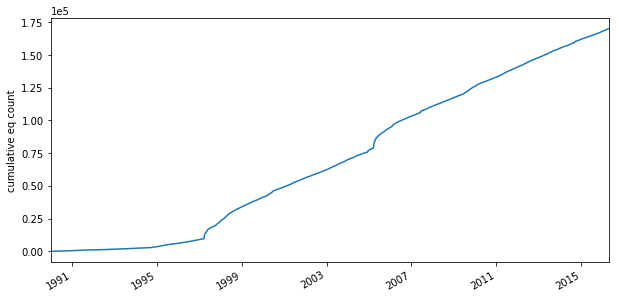

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional[df_regional.mag>=0.5], fig=fig, ax=ax)

In [10]:
df_regional.index

DatetimeIndex(['1990-01-02 02:44:24.799992', '1990-01-03 19:35:45.499990',
               '1990-01-03 21:05:43.199987', '1990-01-04 17:41:11.499992',
               '1990-01-04 17:48:03.500001', '1990-01-05 04:11:00.100005',
               '1990-01-06 20:33:12.499982', '1990-01-07 04:54:37.099993',
               '1990-01-07 20:17:39.599999', '1990-01-07 20:28:49.499987',
               ...
               '2016-04-13 23:20:35.999996', '2016-04-13 23:46:02.099992',
               '2016-04-14 00:52:09.440003', '2016-04-14 01:49:54.340011',
               '2016-04-14 03:58:37.439999', '2016-04-14 05:14:23.729987',
               '2016-04-14 07:20:48.159991', '2016-04-14 09:44:12.830003',
               '2016-04-14 10:12:22.199994', '2016-04-14 10:43:18.200015'],
              dtype='datetime64[ns]', name='timestamp', length=170188, freq=None)

In [215]:
radii = np.arange(5, 25, 1)
foreshock_time = eq['time']

timii = pd.date_range(start='01-01-2001 00:00:00', end=foreshock_time, freq='120M', tz='GMT')
parameters = [x for x in product(radii, timii)]

(<mpl_toolkits.basemap.Basemap at 0x7f7f341644a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f34109240>)

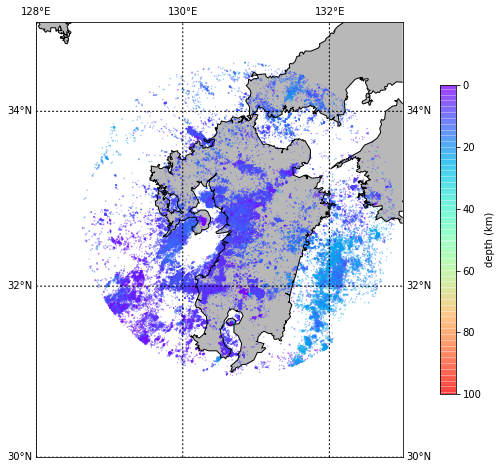

In [216]:
# fig, ax = plt.subplots()
plotting.plot_seismicity_map(dataframe=df_regional)

In [217]:
# lats_min_max = (32., 33.5)
# lons_min_max = (129.5, 132.)
# lats = np.linspace(32., 33.5, (33.5-32)/0.05 + 1.)
# lons = np.linspace(129.5, 132, (132 - 129.5)/0.05 + 1.)
# lats_lons = [x for x in product(lons, lats)]
# len(lats_lons)

In [218]:
# df_calc = df_regional.copy()

# rows = []

# for r, t in parameters:
#     try:
#         df_c = polygon_selection.get_node_data(node=eq['coordinates'], data=df_calc, radius=r, m=1)
#         df_c = df_c.loc[df_c.index >= t]

#         a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_c.mag)
#         row = np.array((r,) + (t,) + (a, b, bstd, n, mc))
#         rows.append(row)
#     except:
#         row = np.array((r,) + (t,) +(np.nan, np.nan, np.nan, np.nan, np.nan))

In [219]:
def calc_b_value_for_parameters(dataframe, parameters, location):
    rows = []
    try:
        for r, t in parameters:
            df_c = polygon_selection.get_node_data(node=location, data=dataframe, radius=r, m=1)
            df_c = df_c.loc[df_c.index >= t]

            a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_c.mag)
            row = np.array((r,) + (t,) + (a, b, bstd, n, mc) + tuple(location))
            rows.append(row)
    except:
        row = np.array((r,) + (t,) +(np.nan, np.nan, np.nan, np.nan, np.nan) + tuple(location))
    
    return rows

In [220]:
# true_bdf = pd.DataFrame(rows, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc'])
# true_bdf.groupby(['start_time']).mean()

In [221]:
def calc_b_for_parameters_attr_iter(attr):
    dataframe, parameters, location = attr
    return calc_b_value_for_parameters(dataframe, parameters, location)

In [14]:
# from multiprocessing import Pool
# pool = Pool()

# pool.map(calc_b_for_parameters_attr_iter, [(df_regional, parameters, eq['coordinates'])
#                                           ,(df_regional, parameters, (131, 33))
#                                           ,(df_regional, parameters, (131, 32.5))])

In [222]:
increment = 0.05
lat_min, lat_max = (32, 33.5)
lon_min, lon_max = (128, 133)
lats = np.linspace(lat_min, lat_max, (lat_max - lat_min)/increment + 1)
lons = np.linspace(lon_min, lon_max, (lon_max - lon_min)/increment + 1)
lats_lons = [x for x in product(lons, lats)]

len(lats_lons)

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


3131

In [223]:
everything = []

for lon_lat in lats_lons:
    everything.append((df_regional, parameters, lon_lat))

In [ ]:
from multiprocessing import Pool
pool = Pool()

results = pool.map(calc_b_for_parameters_attr_iter, everything)

/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in 

In [18]:
# true_bdf = pd.DataFrame(None, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc', 'lon', 'lat'])
# true_bdf.head()

In [19]:
# d1 = pd.DataFrame({'a':[1,2,3]})
# d2 = pd.DataFrame({'a':[4,5,6]})
# pd.concat([d1, d2, d1])

In [ ]:
# for r in results:
#     pd.concat([true_bdf, pd.DataFrame(r, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc', 'lon', 'lat'])])

results_df = [pd.DataFrame(r, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc', 'lon', 'lat']) for r in results]

In [ ]:
results_df = pd.concat(results_df)

In [ ]:
results_mean = results_df.groupby(['lon', 'lat', 'start_time']).mean().reset_index()

In [ ]:
results_df.to_csv('average_b_value_spatial_map_kyushu.csv', index=False)

In [ ]:
results_df = pd.read_csv('average_b_value_spatial_map_kyushu.csv')

In [237]:
results_df.start_time.unique()

array(['2000-01-31 00:00:00+00:00', '2010-01-31 00:00:00+00:00'], dtype=object)

In [243]:
results_df.

SyntaxError: invalid syntax (<ipython-input-243-24d620833897>, line 1)

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


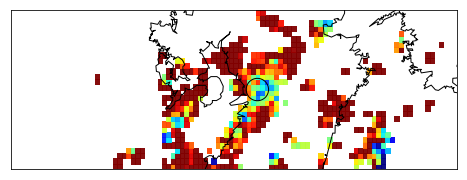

In [242]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_df.lon.values
lats = results_df.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_df[(results_df.radius == 5) & (results_df.start_time < '2005')].copy()

n_remove = 50
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n < n_remove, 'b'] = np.nan
# data.ix[data.n_y < n_remove, 'b_y'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='b').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', vmin=0.6, vmax=0.9, alpha=0.95)

# fig.colorbar(cbar, label='b', orientation='horizontal')
# ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

In [174]:
results_avg = results_df.groupby(['lon', 'lat', 'start_time']).mean().reset_index()

In [175]:
results_2000 = results_avg[results_avg.start_time < '2005']
results_2010 = results_avg[results_avg.start_time > '2005']

In [176]:
results_avg = results_2000.merge(results_2010, on=['lon', 'lat'])

In [177]:
results_avg.head()

,lon,lat,start_time_x,radius_x,a_x,b_x,bstd_x,n_x,mc_x,start_time_y,radius_y,a_y,b_y,bstd_y,n_y,mc_y
0,129.5,32.00,2000-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN,2010-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN
1,129.5,32.05,2000-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN,2010-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN
2,129.5,32.10,2000-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN,2010-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN
3,129.5,32.15,2000-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN,2010-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN
4,129.5,32.20,2000-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN,2010-01-31 00:00:00+00:00,14.5,NaN,NaN,NaN,NaN,NaN


In [178]:
results_avg['b_diff'] = -1.*(results_avg.b_x - results_avg.b_y)

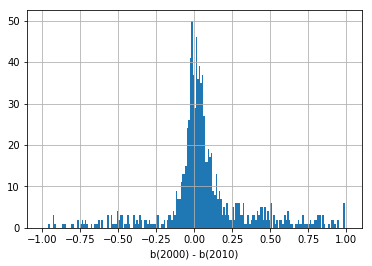

In [179]:
ax = results_avg.b_diff.hist(bins=200, range=(-1, 1))
ax.set_xlabel('b(2000) - b(2010)')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


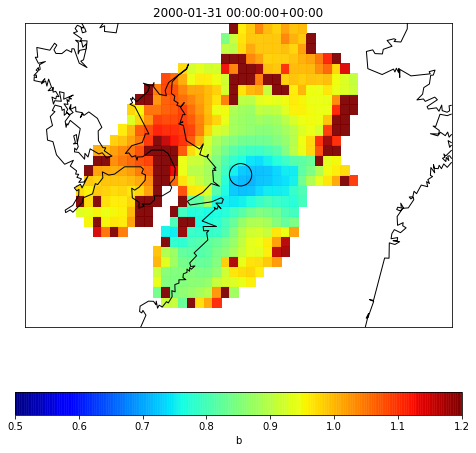

In [180]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'b_x'] = np.nan
data.ix[data.n_y < n_remove, 'b_y'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='b_x').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', vmin=0.5, vmax=1.2, alpha=0.95)

fig.colorbar(cbar, label='b', orientation='horizontal')
ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


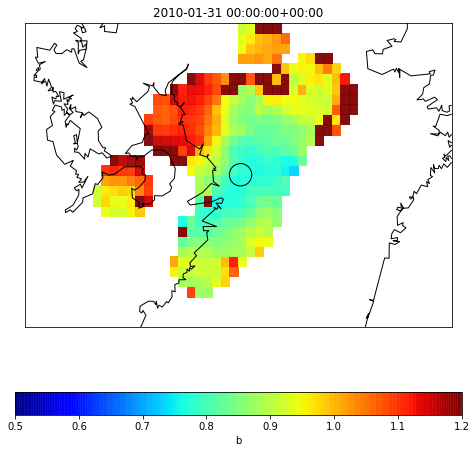

In [181]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'b_x'] = np.nan
data.ix[data.n_y < n_remove, 'b_y'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='b_y').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', vmin=0.5, vmax=1.2, alpha=0.95)

fig.colorbar(cbar, label='b', orientation='horizontal')
ax.set_title(data.start_time_y.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


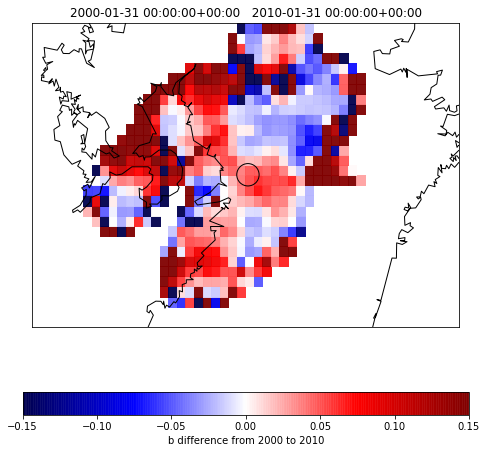

In [182]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'b_x'] = np.nan
data.ix[data.n_y < n_remove, 'b_y'] = np.nan
data.ix[data.n_x < n_remove, 'b_diff'] = np.nan
data.ix[data.n_y < n_remove, 'bdiff'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='b_diff').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='seismic', vmin=-0.15, vmax=0.15, alpha=0.95)

fig.colorbar(cbar, label='b difference from 2000 to 2010', orientation='horizontal')
ax.set_title(data.start_time_x.head(1)[0] + '   ' + data.start_time_y.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


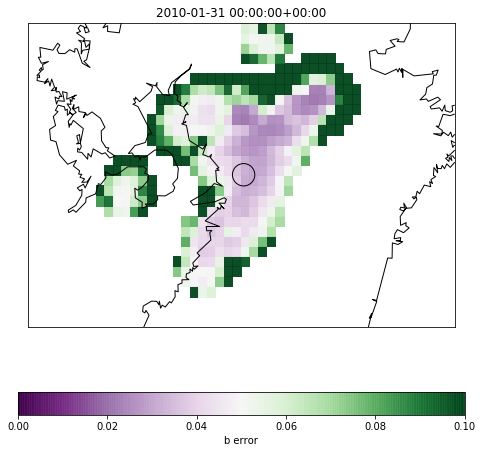

In [183]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'bstd_x'] = np.nan
data.ix[data.n_y < n_remove, 'bstd_y'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='bstd_y').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='PRGn', vmin=0.0, vmax=0.1, alpha=0.95)

fig.colorbar(cbar, label='b error', orientation='horizontal')
ax.set_title(data.start_time_y.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


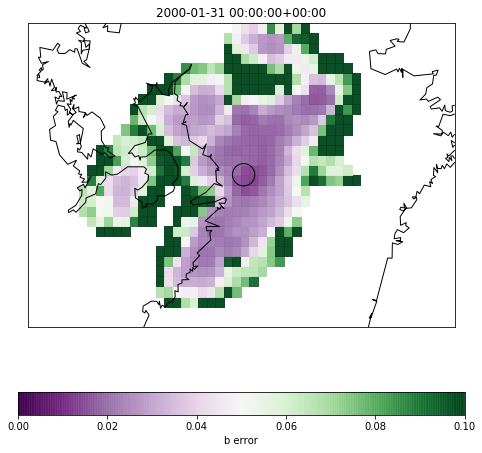

In [184]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'bstd_x'] = np.nan
data.ix[data.n_y < n_remove, 'bstd_y'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='bstd_x').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='PRGn', vmin=0.0, vmax=0.1, alpha=0.95)

fig.colorbar(cbar, label='b error', orientation='horizontal')
ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

In [185]:
results_sf = results_df[results_df.start_time < '2005'].merge(results_df[results_df.start_time > '2005'], on=['radius', 'lon', 'lat'])

In [186]:
results_sf['berr_avg'] = ((results_sf['bstd_x'] + results_sf['bstd_y'])/2.)

In [187]:
results_sf_avg = results_sf.groupby(['lon', 'lat']).mean().reset_index()

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


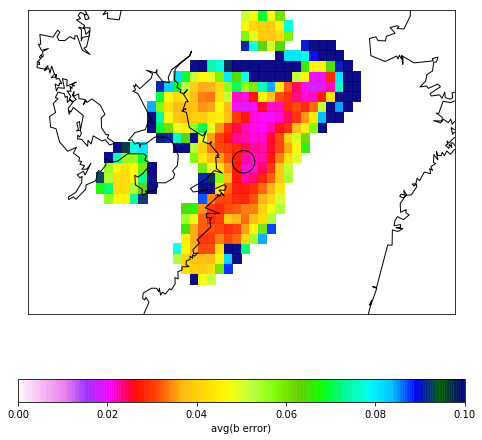

In [198]:
fig, ax = plt.subplots(figsize=(8, 8))


lons = results_avg.lon.values
lats = results_avg.lat.values

lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

lon_i = np.linspace(lon_min, lon_max, (lon_max - lon_min)/0.05 + 1)
lat_i = np.linspace(lat_min, lat_max, (lat_max - lat_min)/0.05 + 1)


m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

m.drawcoastlines()

data = results_sf_avg.copy()

n_remove = 250
# print('shape', data.shape)
# print('data copy', data[data.n_x < n_remove].b_x.describe())
data.ix[data.n_x < n_remove, 'berr_avg'] = np.nan
data.ix[data.n_y < n_remove, 'berr_avg'] = np.nan
# print('data removal', data[data.n_x < n_remove].b_x.describe())

zi = data.pivot(index='lat', columns='lon', values='berr_avg').values

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)
# >>> ma.masked_where(a <= 2, a)
# zi = np.ma.masked_where(zi > 2.0, zi)
# zi = np.ma.masked_where(zi < 0.5, zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='gist_ncar_r', vmin=0.0, vmax=0.1, alpha=0.95)

fig.colorbar(cbar, label='avg(b error)', orientation='horizontal')
# ax.set_title(data.start_time_x.head(1)[0])

x, y = m(eq['coordinates'][0], eq['coordinates'][1])
ax.scatter(x, y, s=500, color='None', edgecolor='black')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


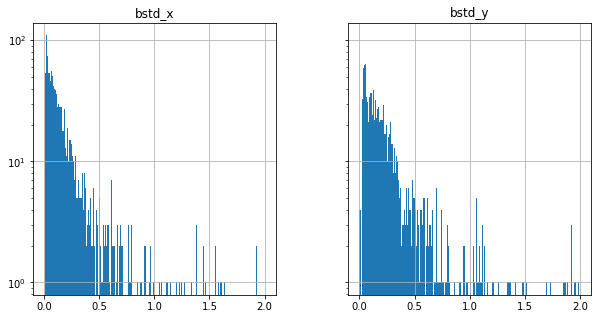

In [205]:
fig, ax = plt.subplots(figsize=(10,5))
results_sf_avg[['bstd_x', 'bstd_y']].hist(sharey=True, bins=200, range=(0,2), log=True, ax=ax)

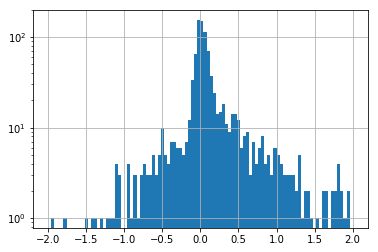

In [53]:
results_avg.b_diff.hist(bins=100, range=(-2, 2), log=True)

In [35]:
results_avg.b_diff.describe()

count    1063.000000
mean       -0.347357
std         1.121731
min        -7.872642
25%        -0.276043
50%        -0.041889
75%         0.024750
max         3.589008
Name: b_diff, dtype: float64

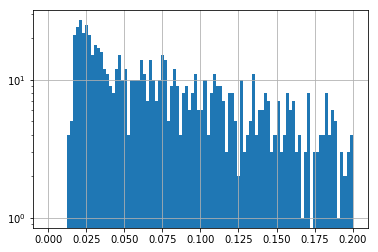

In [58]:
results_avg.bstd_x.hist(bins=100, range=(0,0.2), log=True)

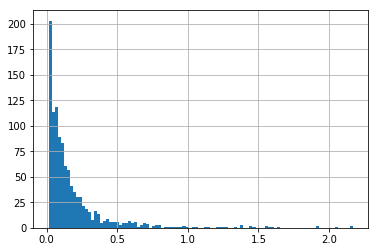

In [113]:
radii = np.arange(1, 51, 1)
timii = pd.date_range(start='01-01-1990 00:00:00', end=foreshock_time, freq='6M', tz='GMT')
parameters = [x for x in product(radii, timii)]
bdf = calc_b_value_for_parameters(dataframe=df_regional, parameters=parameters, location=eq['coordinates'])

/home/max/pymap3/utilities/stats.py:43: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average)**2)/(length*(length-1)) for m in magnitudes])


In [114]:
b_df = pd.DataFrame(bdf, columns=['radius', 'start_time', 'a', 'b', 'b_err', 'n', 'mc', 'lon', 'lat'])

''

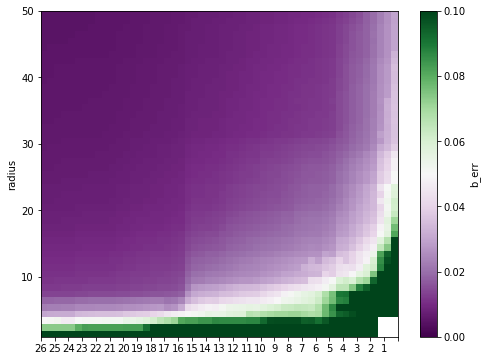

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
plotting.plot_radius_time_sweep(b_df, 'radius', 'b_err', fig, ax, vmin=0, vmax=0.1, cmap='PRGn')
xt = np.arange(1, 27, 1)[::-1]
ax.set_xticklabels(xt, rotation=0)
''

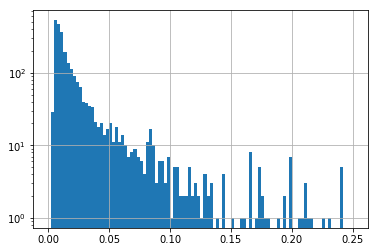

In [116]:
b_df.b_err.hist(bins=100, range=(0,0.25), log=True)

In [1]:
df_regional

NameError: name 'df_regional' is not defined